Imports

In [60]:
#data modeling
import pandas as pd #pandas
import numpy as np #Matrizes

#graphic analysis
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#warnings
import warnings
warnings.filterwarnings('ignore')

#pandas adjusts
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

#matplot adjusts
plt.rcParams['figure.figsize'] = (15,6) #graphic size
plt.style.use('seaborn-darkgrid') #graphic style

In [61]:
#data reading
dataBooks = pd.read_csv('Books.csv')
dataRatings = pd.read_csv('Ratings.csv')
dataUsers = pd.read_csv('Users.csv')

dataBooks.shape, dataRatings.shape, dataUsers.shape

((271360, 8), (1149780, 3), (278858, 3))

Infos & view

In [62]:
dataBooks.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [63]:
dataBooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [64]:
dataRatings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [65]:
dataRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [66]:
dataUsers.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [67]:
dataUsers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Data crossing

In [68]:
crossTab = dataBooks.merge(dataRatings, how='inner', on='ISBN')
crossTab = crossTab.merge(dataUsers, how='inner', on='User-ID')

In [69]:
crossTab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031135 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [70]:
#adjusting invalid value
crossTab.iloc[287500,3] = ''
crossTab.iloc[467962,3] = ''
crossTab.iloc[469216,3] = ''
crossTab.iloc[352361,3] = ''


#converting the year column
pd.to_numeric(crossTab['Year-Of-Publication'])

0          2002.0
1          2001.0
2          1991.0
3          1999.0
4          1999.0
            ...  
1031131    1966.0
1031132    2001.0
1031133    1981.0
1031134    1998.0
1031135    2003.0
Name: Year-Of-Publication, Length: 1031136, dtype: float64

In [71]:
crossTab['Location'].tail(5)

1031131                       venice, florida, usa
1031132                   tioga, pennsylvania, usa
1031133                      madrid, madrid, spain
1031134                  grand prairie, texas, usa
1031135    bielefeld, nordrhein-westfalen, germany
Name: Location, dtype: object

In [72]:
#function to extract the country from region column
def extractCountry(region):
    registry = region.split(',')[1].upper()
    return registry

#adding country column
crossTab['country'] = crossTab['Location'].apply(extractCountry)

In [73]:
crossTab.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,CALIFORNIA
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,ONTARIO
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,ONTARIO


In [74]:
crossTab.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                     0
Book-Rating                 0
Location                    0
Age                    277835
country                     0
dtype: int64

In [75]:
crossTab.nunique()

ISBN                   270151
Book-Title             241071
Book-Author            101588
Year-Of-Publication       201
Publisher               16729
Image-URL-S            269842
Image-URL-M            269842
Image-URL-L            269839
User-ID                 92106
Book-Rating                11
Location                22480
Age                       141
country                  1959
dtype: int64

In [76]:
#renaming columns

crossTab = crossTab.rename(
    columns={
        'Book-Title': 'title',
        'Book-Author': 'author',
        'Year-Of-Publication': 'year',
        'Publisher': 'publisher',
        'User-ID': 'userId',
        'Book-Rating': 'rating',
        'Location': 'location',
        'Age': 'age'
    }
)

Data visualization

In [77]:
#descriptive analysis
crossTab.describe()

,userId,rating,age
count,1.031136e+06,1.031136e+06,753301.000000
mean,1.405945e+05,2.839051e+00,37.397648
std,8.052466e+04,3.854157e+00,14.098254
min,2.000000e+00,0.000000e+00,0.000000
25%,7.041500e+04,0.000000e+00,28.000000
50%,1.412100e+05,0.000000e+00,35.000000
75%,2.114260e+05,7.000000e+00,45.000000
max,2.788540e+05,1.000000e+01,244.000000


In [78]:
#deleting 00 rating

crossTab = crossTab.loc[crossTab['rating'] > 0 ]

crossTab.describe()

,userId,rating,age
count,383842.000000,383842.000000,269621.000000
mean,136031.461260,7.626701,36.835829
std,80482.299401,1.841339,13.753045
min,8.000000,1.000000,0.000000
25%,67591.000000,7.000000,28.000000
50%,133789.000000,8.000000,35.000000
75%,206219.000000,9.000000,45.000000
max,278854.000000,10.000000,244.000000


<AxesSubplot:title={'center':'Analyzing Ratings'}, xlabel='rating'>

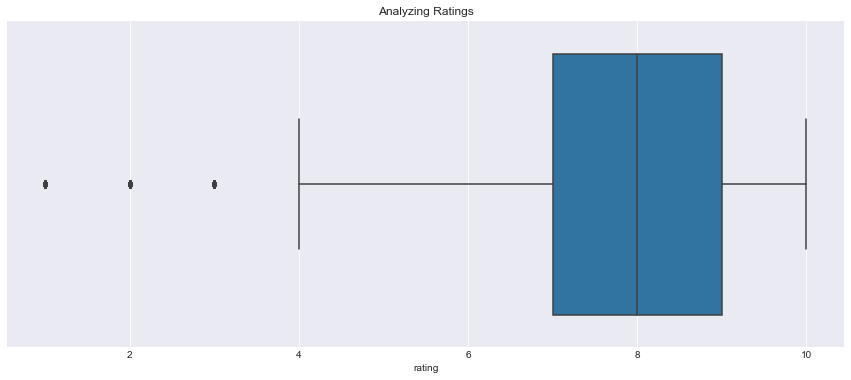

In [79]:
plt.title('Analyzing Ratings')
sns.boxplot(data= crossTab, x='rating')

In [80]:
bestTitles = crossTab.groupby( by = ['title']). agg(
    quantity = ('title', 'count'),
    mean = ('rating', 'mean'),
    max = ('rating', 'max'),
    min = ('rating', 'min'),
    median = ('rating', 'median')
)

bestTitles.head()

,quantity,mean,max,min,median
title,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1,9.000000,9,9,9.0
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000,8,8,8.0
Dark Justice,1,10.000000,10,10,10.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7,7.142857,10,1,7.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),2,10.000000,10,10,10.0


In [81]:
bestTitles.sort_values(['quantity', 'mean'], ascending=False).head()

,quantity,mean,max,min,median
title,,,,,
The Lovely Bones: A Novel,707,8.185290,10,1,8.0
Wild Animus,581,4.390706,10,1,4.0
The Da Vinci Code,494,8.439271,10,1,9.0
The Secret Life of Bees,406,8.477833,10,2,9.0
The Nanny Diaries: A Novel,393,7.437659,10,1,8.0


In [82]:
# quantity vs. rating

px.scatter(
    data_frame = bestTitles,
    x = 'quantity', y = 'mean',
    title= 'quantity vs. rating - Titles')

In [109]:
def sortingQuantity(quantity):
    if int(quantity) <= 5:
        return '1-5 ratings'
    elif int(quantity) <= 10:
        return '6-10 ratings'
    elif int(quantity) <= 100:
        return '11-50 ratings'
    elif int(quantity) <= 100:
        return '-100 ratings'
    else:
        return '>101 ratings'

pizza = bestTitles['quantity'].apply(sortingQuantity).value_counts(normalize=True)

pizza = pd.DataFrame(pizza).reset_index()

In [110]:

px.pie(
    data_frame= pizza,
    names= 'index', 
    values = 'quantity',
    title= 'sorting quantity'
)

In [119]:
#year  of publication


NameError: name 'sort_index' is not defined

In [117]:
plt.bar(years['index'], years['year'])

TypeError: 'method' object is not subscriptable